<a href="https://colab.research.google.com/github/FurkanUysal00/Simple-Linear-Regression/blob/main/Simple_Linear_Regression_on_Cereal_Preferences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

 # Visualisation of Data

In [31]:
cereal = pd.read_csv("/content/DataSet/cereal.csv")
df = cereal.copy()

<ipython-input-123-4123b8a13a78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)  # There is remarkable negative coorelation between sugar and rating


<Axes: >

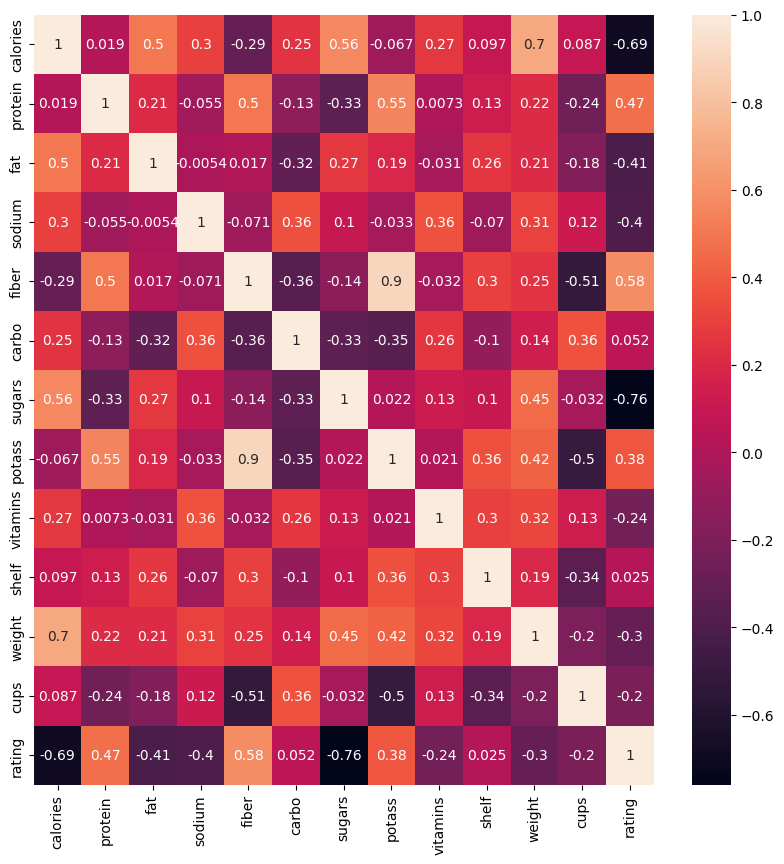

In [123]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)  # There is remarkable negative coorelation between sugar and rating

Text(0, 0.5, 'Rating')

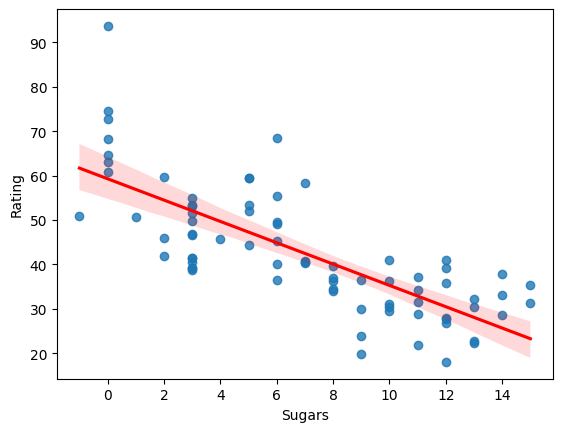

In [39]:
sns.regplot(x=df["sugars"], y=df["rating"], line_kws={"color":"red"})
plt.xlabel("Sugars")
plt.ylabel("Rating")

# Splitting and Scaling Data

In [108]:
scaler=MinMaxScaler()
X=scaler.fit_transform(df[["sugars"]])
y=scaler.fit_transform(df[["rating"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Building Model

In [113]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [114]:
y_pred = model.predict(X_test)

In [115]:
r2_score(y_test, y_pred)

0.5141567137143157

In [116]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.12785178381237364

# Last Visualisation

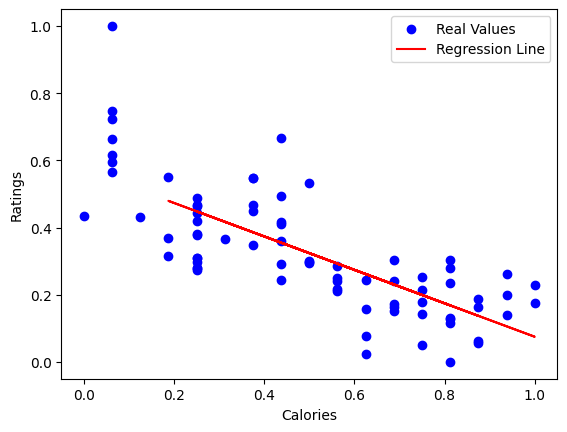

In [122]:
plt.scatter(X,y,color="blue",label="Real Values")
plt.plot(X_test,y_pred,color="red",label="Regression Line")
plt.xlabel("Calories")
plt.ylabel("Ratings")
plt.legend()